In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris




In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
df = pd.DataFrame(iris.data , columns= iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['target_names'] = df.target.apply(lambda x : iris.target_names[x])

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df.to_csv(r"iris.csv")

In [14]:
target = df['target']
df.drop(['target' , 'target_names'] , axis = "columns",inplace= True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df,target, random_state= 39)

In [17]:
from sklearn.svm import SVC

In [18]:
model = SVC()

In [19]:
model.fit(x_train , y_train)

SVC()

In [20]:
model.score(x_test , y_test)

0.9736842105263158

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix , ConfusionMatrixDisplay

In [23]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [24]:
precision_score(y_test , y_pred, average= 'macro')

0.9761904761904763

In [25]:
recall_score(y_test , y_pred , average= "macro")

0.9743589743589745

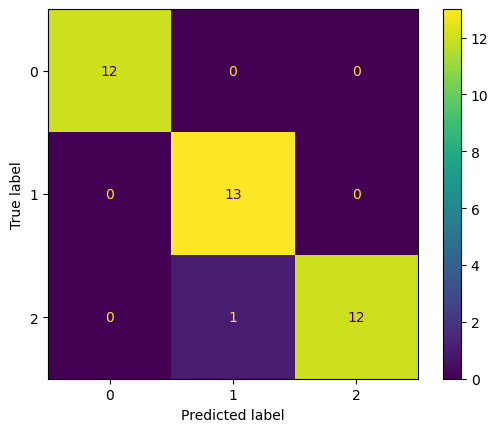

In [26]:
cm = confusion_matrix(y_test , y_pred)
cmDisplay = ConfusionMatrixDisplay(cm)
cmDisplay.plot()
plt.show()

In [27]:
import pickle

In [28]:
pickle.dump(model , open(r"iris_SVC_model" , "wb"))

In [29]:
del model

In [30]:
model = pickle.load(open(r"./iris_SVC_model" , "rb"))

In [31]:
model.score(x_test , y_test)

0.9736842105263158

In [32]:
df.iloc[103]

sepal length (cm)    6.3
sepal width (cm)     2.9
petal length (cm)    5.6
petal width (cm)     1.8
Name: 103, dtype: float64